# Churn Prediction


## Importação de bibliotecas

Nesta seção são importadas as bibliotecas necessárias para análise e modelagem. Não altere as importações sem verificar dependências.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carregamento do dataset

Carregamos o arquivo contendo os dados utilizados no projeto. Confirme o caminho do arquivo se houver erro.

In [3]:
# --- Carregando os dados ---
try:
    df = pd.read_csv('../dataset/BankChurners.csv')
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo 'bankchurners_.csv' não encontrado. Verifique o caminho do arquivo.")
    exit()

Arquivo carregado com sucesso!


## Análise Exploratória (EDA)

Aqui verificamos a estrutura dos dados, distribuições e relações iniciais entre variáveis para guiar o pré-processamento e modelagem.

In [4]:
print(df.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
# --- Limpeza Inicial ---
df = df.iloc[:, :-2]
print(f"Dataset agora tem {df.shape[0]} linhas e {df.shape[1]} colunas.")


Dataset agora tem 10127 linhas e 21 colunas.


In [8]:
# --- Inspeção Básica ---
print("\n--- Informações Gerais do DataFrame (Tipos de Dados e Nulos) ---")
df.info()


--- Informações Gerais do DataFrame (Tipos de Dados e Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  


In [9]:
print("\n--- 5 Primeiras Linhas do DataFrame ---")
print(df.head())


--- 5 Primeiras Linhas do DataFrame ---
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1    

## Análise da variável-alvo

Analisamos a distribuição da variável-alvo (Attrition_Flag / churn) para avaliar balanceamento e comportamento por grupos.

In [10]:
# --- Análise da Variável-Alvo (Attrition_Flag) ---
print("\n--- Distribuição da Variável-Alvo (Churn) ---")
churn_distribution = df['Attrition_Flag'].value_counts(normalize=True) * 100
print(churn_distribution)


--- Distribuição da Variável-Alvo (Churn) ---
Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64


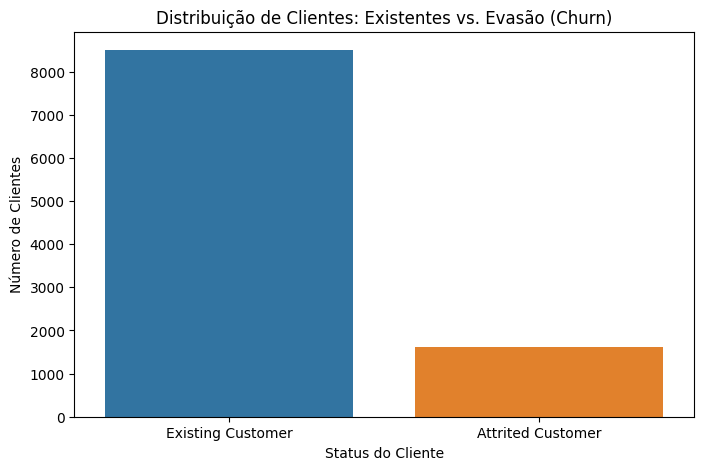

In [11]:
# Visualização da distribuição da variável-alvo
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition_Flag', data=df, hue='Attrition_Flag', legend=False)
plt.title('Distribuição de Clientes: Existentes vs. Evasão (Churn)')
plt.ylabel('Número de Clientes')
plt.xlabel('Status do Cliente')
plt.show()

In [ ]:
# 0 = Existing Customer, 1 = Attrited Customer (Churn)
df_analysis = df.copy()
df_analysis['Churn'] = df_analysis['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [13]:
# Lista de colunas demográficas que serão analisadas
demographic_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category']


--- Análise de Churn por: Gender ---
Churn   % Ficaram   % Sairam
Gender                      
F       82.642777  17.357223
M       85.384777  14.615223


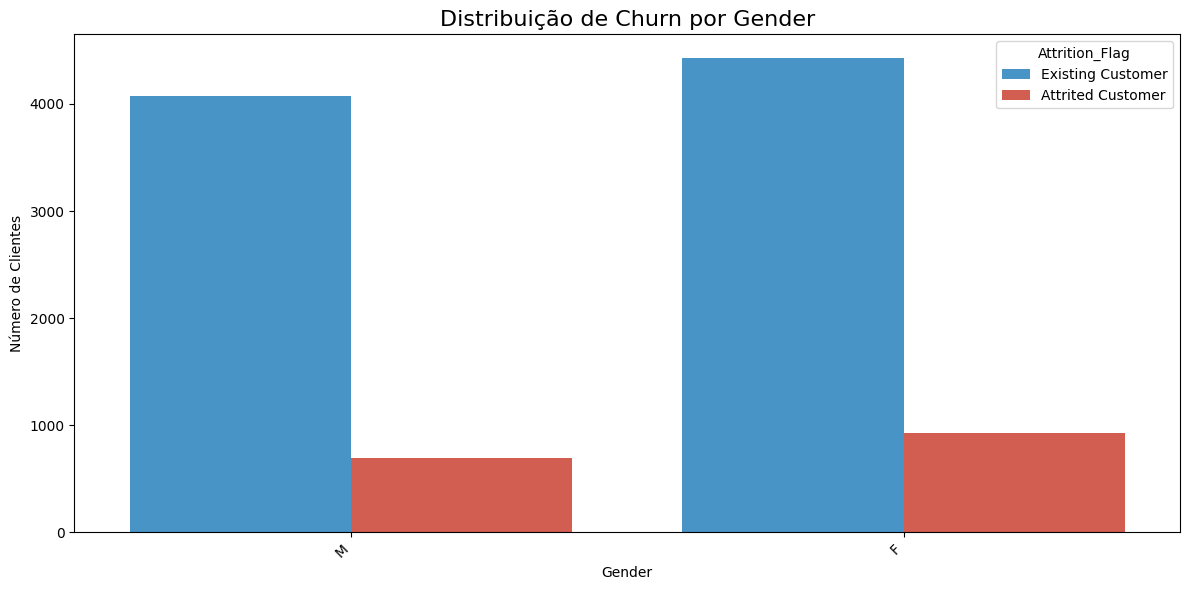


--- Análise de Churn por: Education_Level ---
Churn            % Ficaram   % Sairam
Education_Level                      
College          84.797631  15.202369
Doctorate        78.935698  21.064302
Graduate         84.430946  15.569054
High School      84.798808  15.201192
Post-Graduate    82.170543  17.829457
Uneducated       84.061870  15.938130
Unknown          83.146807  16.853193


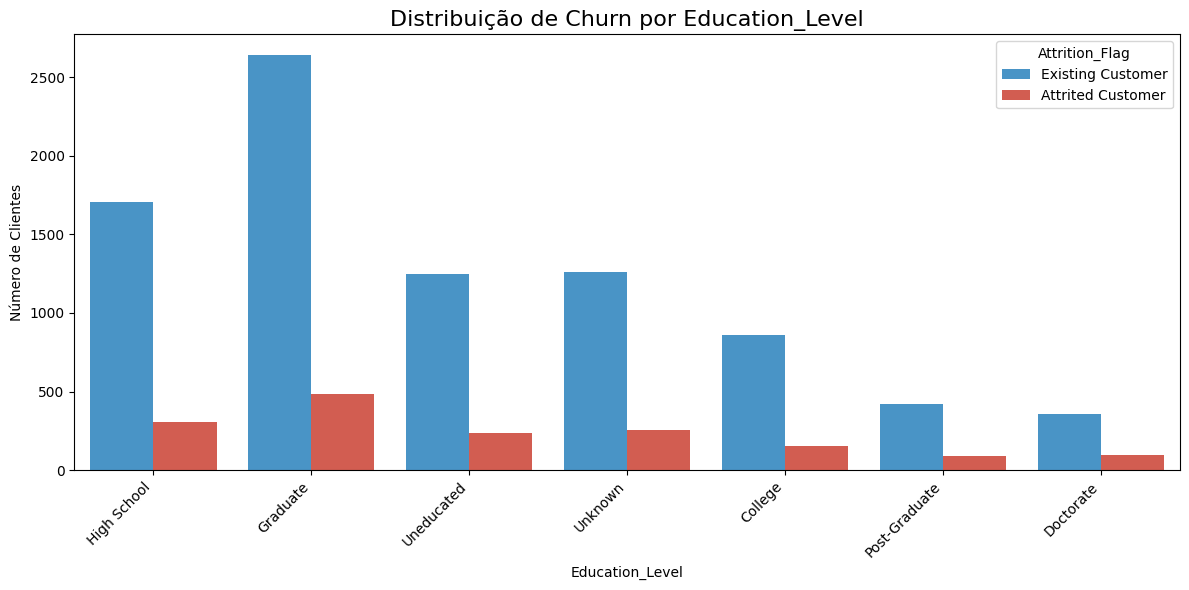


--- Análise de Churn por: Marital_Status ---
Churn           % Ficaram   % Sairam
Marital_Status                      
Divorced        83.823529  16.176471
Married         84.873053  15.126947
Single          83.058585  16.941415
Unknown         82.777036  17.222964


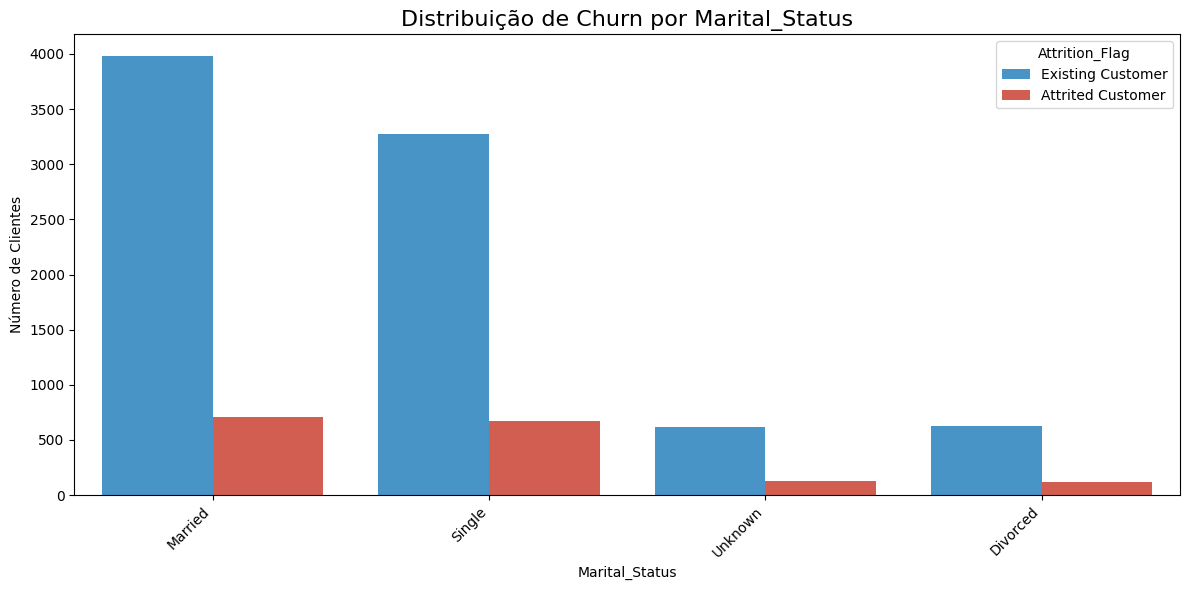


--- Análise de Churn por: Income_Category ---
Churn            % Ficaram   % Sairam
Income_Category                      
$120K +          82.668501  17.331499
$40K - $60K      84.860335  15.139665
$60K - $80K      86.519258  13.480742
$80K - $120K     84.234528  15.765472
Less than $40K   82.813816  17.186184
Unknown          83.183453  16.816547


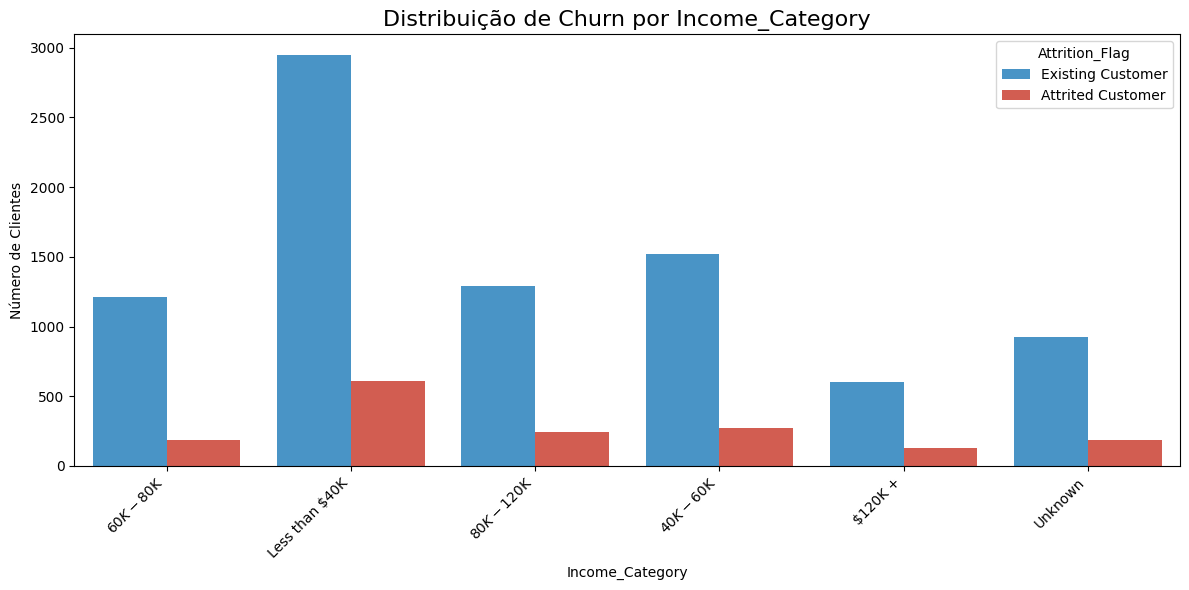

In [14]:
for col in demographic_cols:
    print(f"\n--- Análise de Churn por: {col} ---")
    
    # Calcula a taxa de churn para cada categoria na coluna
    churn_rate = df_analysis.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_rate = churn_rate.mul(100).rename(columns={0: '% Ficaram', 1: '% Sairam'})
    print(churn_rate)
    
    # Visualização
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Attrition_Flag', data=df_analysis, palette=['#3498db', '#e74c3c'])
    plt.title(f'Distribuição de Churn por {col}', fontsize=16)
    plt.ylabel('Número de Clientes')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right') # Rotaciona os labels para melhor visualização
    plt.tight_layout() # Ajusta o layout para não cortar os labels
    plt.show()



--- Análise de Churn por: Idade ---


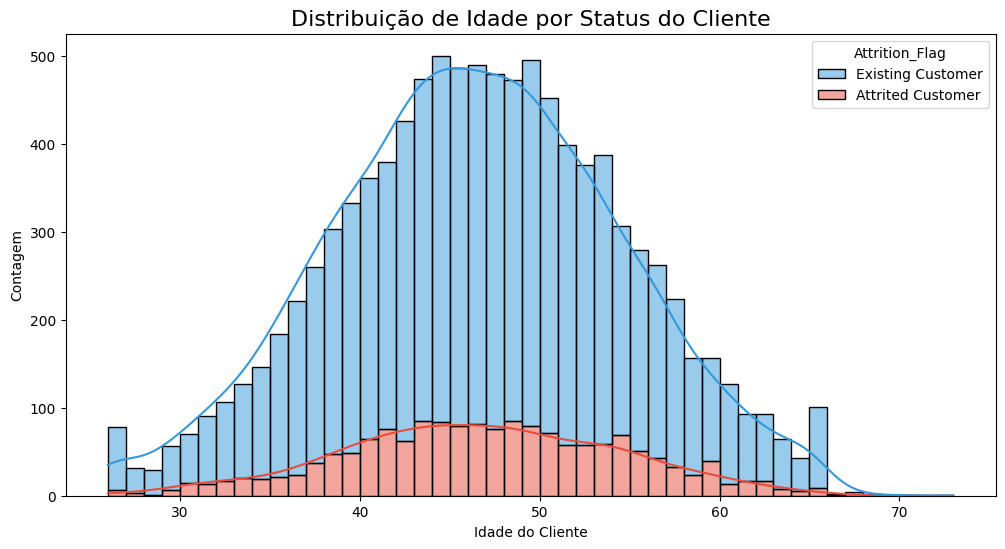

In [15]:
# Análise específica por Idade (variável contínua)
print("\n--- Análise de Churn por: Idade ---")
plt.figure(figsize=(12, 6))
sns.histplot(data=df_analysis, x='Customer_Age', hue='Attrition_Flag', multiple='stack', kde=True, palette=['#3498db', '#e74c3c'])
plt.title('Distribuição de Idade por Status do Cliente', fontsize=16)
plt.xlabel('Idade do Cliente')
plt.ylabel('Contagem')
plt.show()

In [16]:
# Estatísticas de idade por grupo
age_stats = df_analysis.groupby('Attrition_Flag')['Customer_Age'].describe()
print(age_stats)

                    count       mean       std   min   25%   50%   75%   max
Attrition_Flag                                                              
Attrited Customer  1627.0  46.659496  7.665652  26.0  41.0  47.0  52.0  68.0
Existing Customer  8500.0  46.262118  8.081157  26.0  41.0  46.0  52.0  73.0


--- Análise de Variáveis Numéricas de Comportamento (Churn vs. Ficaram) ---


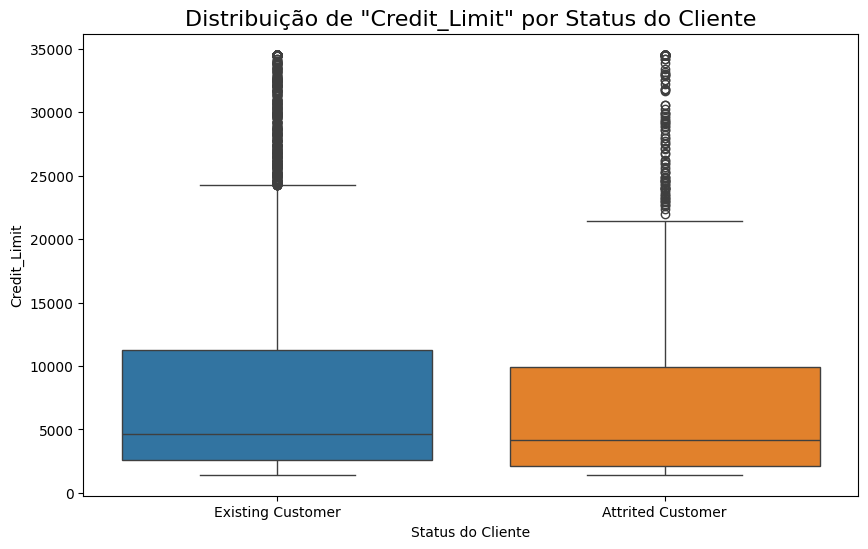


Estatísticas para a variável: Credit_Limit
                    count         mean          std     min     25%     50%  \
Attrition_Flag                                                                
Attrited Customer  1627.0  8136.039459  9095.334105  1438.3  2114.0  4178.0   
Existing Customer  8500.0  8726.877518  9084.969807  1438.3  2602.0  4643.5   

                        75%      max  
Attrition_Flag                        
Attrited Customer   9933.50  34516.0  
Existing Customer  11252.75  34516.0  
--------------------------------------------------


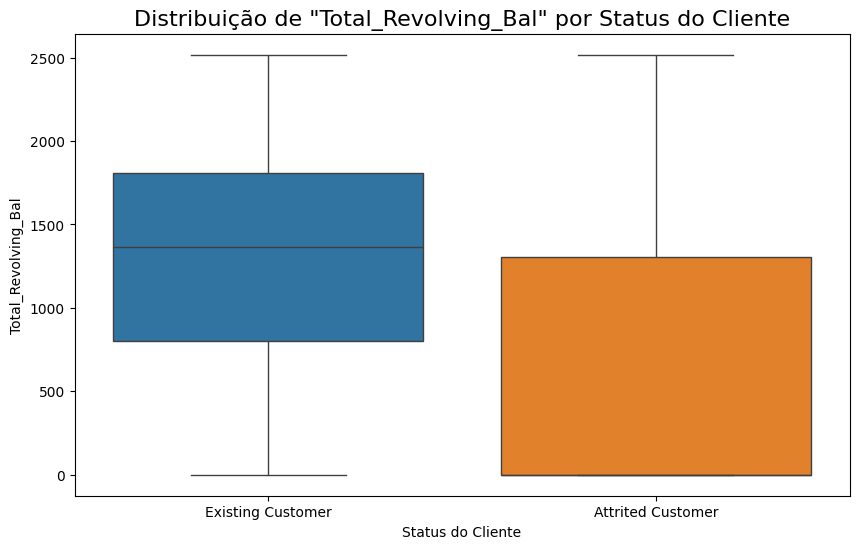


Estatísticas para a variável: Total_Revolving_Bal
                    count         mean         std  min    25%     50%  \
Attrition_Flag                                                           
Attrited Customer  1627.0   672.822987  921.385582  0.0    0.0     0.0   
Existing Customer  8500.0  1256.604118  757.745354  0.0  800.0  1364.0   

                      75%     max  
Attrition_Flag                     
Attrited Customer  1303.5  2517.0  
Existing Customer  1807.0  2517.0  
--------------------------------------------------


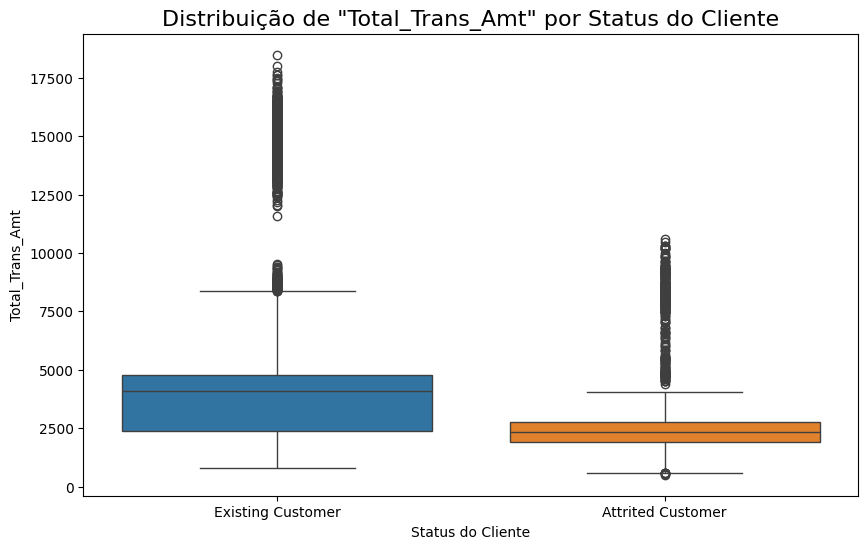


Estatísticas para a variável: Total_Trans_Amt
                    count         mean          std    min      25%     50%  \
Attrition_Flag                                                                
Attrited Customer  1627.0  3095.025814  2308.227629  510.0  1903.50  2329.0   
Existing Customer  8500.0  4654.655882  3512.772635  816.0  2384.75  4100.0   

                       75%      max  
Attrition_Flag                       
Attrited Customer  2772.00  10583.0  
Existing Customer  4781.25  18484.0  
--------------------------------------------------


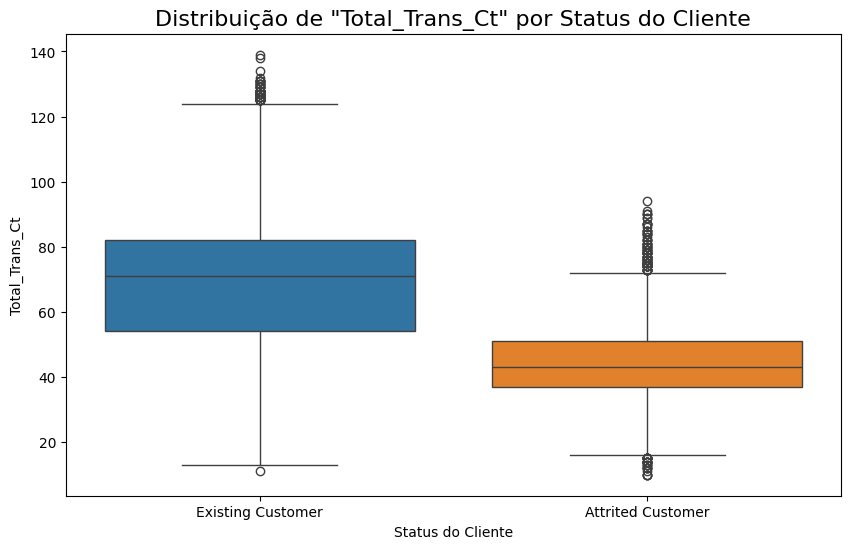


Estatísticas para a variável: Total_Trans_Ct
                    count       mean        std   min   25%   50%   75%    max
Attrition_Flag                                                                
Attrited Customer  1627.0  44.933620  14.568429  10.0  37.0  43.0  51.0   94.0
Existing Customer  8500.0  68.672588  22.919011  11.0  54.0  71.0  82.0  139.0
--------------------------------------------------


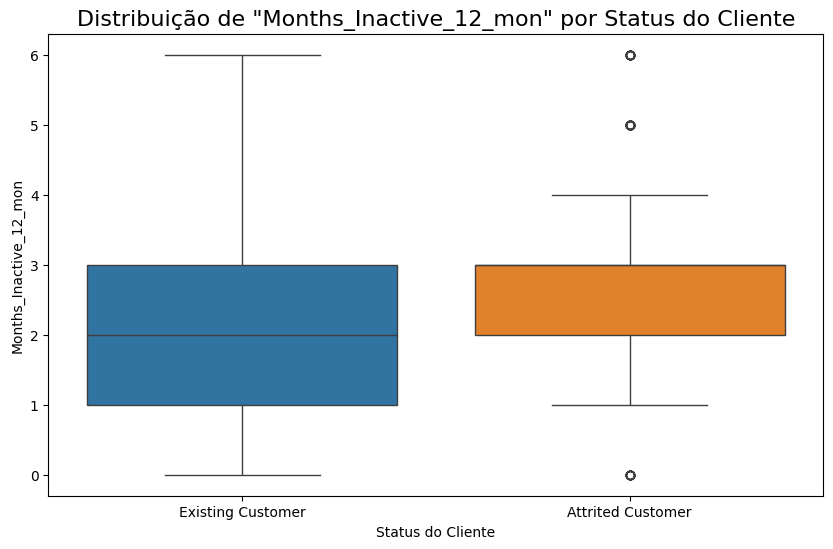


Estatísticas para a variável: Months_Inactive_12_mon
                    count      mean       std  min  25%  50%  75%  max
Attrition_Flag                                                        
Attrited Customer  1627.0  2.693301  0.899623  0.0  2.0  3.0  3.0  6.0
Existing Customer  8500.0  2.273765  1.016741  0.0  1.0  2.0  3.0  6.0
--------------------------------------------------


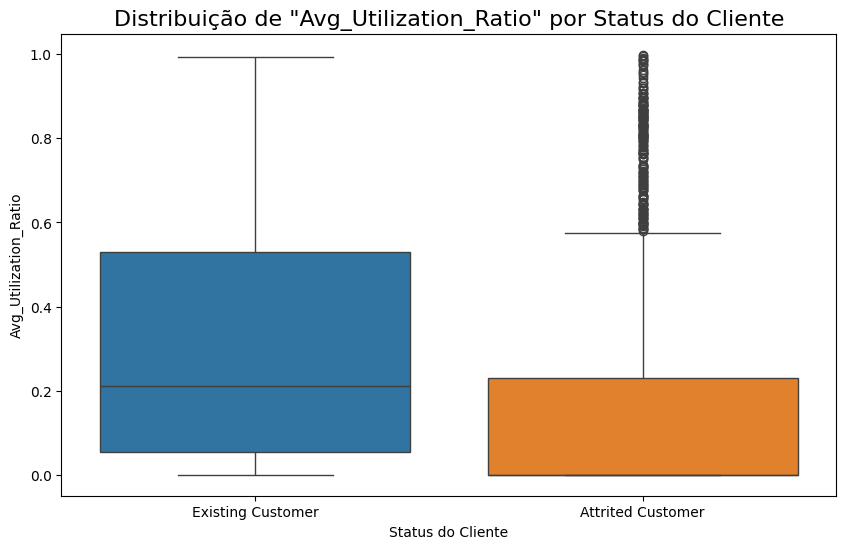


Estatísticas para a variável: Avg_Utilization_Ratio
                    count      mean       std  min    25%    50%      75%  \
Attrition_Flag                                                              
Attrited Customer  1627.0  0.162475  0.264458  0.0  0.000  0.000  0.23100   
Existing Customer  8500.0  0.296412  0.272568  0.0  0.055  0.211  0.52925   

                     max  
Attrition_Flag            
Attrited Customer  0.999  
Existing Customer  0.994  
--------------------------------------------------


In [21]:
# --- 1. Análise de Variáveis Numéricas de Comportamento ---

# Lista de colunas numéricas para investigar
behavioral_numeric_cols = [
    'Credit_Limit', 
    'Total_Revolving_Bal', 
    'Total_Trans_Amt', 
    'Total_Trans_Ct', 
    'Months_Inactive_12_mon', 
    'Avg_Utilization_Ratio'
]

print("--- Análise de Variáveis Numéricas de Comportamento (Churn vs. Ficaram) ---")

for col in behavioral_numeric_cols:
    plt.figure(figsize=(10, 6))
    # Usaremos boxplot para comparar as distribuições
    sns.boxplot(x='Attrition_Flag', y=col, data=df_analysis, hue='Attrition_Flag')
    plt.title(f'Distribuição de "{col}" por Status do Cliente', fontsize=16)
    plt.xlabel('Status do Cliente')
    plt.ylabel(col)
    plt.show()
    
    # Mostrando estatísticas descritivas para confirmar as observações
    print(f"\nEstatísticas para a variável: {col}")
    print(df_analysis.groupby('Attrition_Flag')[col].describe())
    print("-" * 50)



--- Análise de Churn por: Card_Category ---
Churn          % Ficaram   % Sairam
Card_Category                      
Blue           83.902077  16.097923
Gold           81.896552  18.103448
Platinum       75.000000  25.000000
Silver         85.225225  14.774775


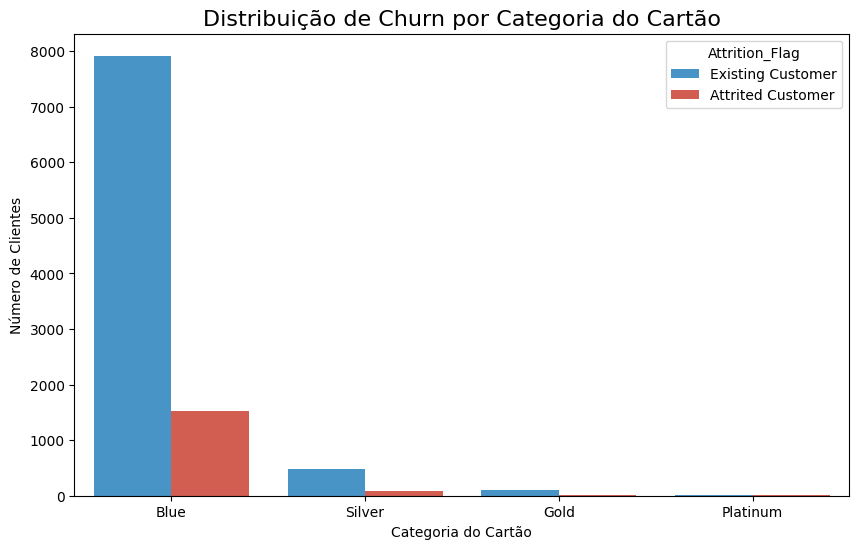

In [22]:
# --- 2. Análise da Categoria do Cartão (Variável Categórica) ---

print("\n\n--- Análise de Churn por: Card_Category ---")

# Calcula a taxa de churn para cada categoria de cartão
churn_rate_card = df_analysis.groupby('Card_Category')['Churn'].value_counts(normalize=True).unstack().mul(100)
churn_rate_card = churn_rate_card.rename(columns={0: '% Ficaram', 1: '% Sairam'})
print(churn_rate_card)

# Visualização
plt.figure(figsize=(10, 6))
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=df_analysis, order=['Blue', 'Silver', 'Gold', 'Platinum'], palette=['#3498db', '#e74c3c'])
plt.title('Distribuição de Churn por Categoria do Cartão', fontsize=16)
plt.ylabel('Número de Clientes')
plt.xlabel('Categoria do Cartão')
plt.show()

In [23]:
# --- 1. Definição da Variável Alvo (Target) ---
df['Churn'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [25]:
# --- 2. Seleção de Colunas (Feature Selection) ---
df_model = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)

print("Colunas a serem usadas no modelo:", df_model.columns.tolist())

Colunas a serem usadas no modelo: ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Churn']


## Engenharia de Features


In [ ]:
# --- 3. Tratamento de Variáveis Categóricas (One-Hot Encoding) ---
df_processed = pd.get_dummies(df_model, drop_first=True)
# 'drop_first=True' usado para evitar redundância (se Gender_M=0, então é'F').

print("\nFormato do DataFrame após One-Hot Encoding:", df_processed.shape)
print("Novas colunas criadas (exemplos):", [col for col in df_processed.columns if '_' in col][:5])


Formato do DataFrame após One-Hot Encoding: (10127, 33)
Novas colunas criadas (exemplos): ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon']


## Limpeza e tratamento de dados

Passos para tratar valores faltantes, remover colunas irrelevantes e corrigir tipos de dados.

In [27]:
# --- 4. Separação de Features (X) e Target (y) ---

print("\n--- Iniciando a separação de Features e Target ---")
X = df_processed.drop('Churn', axis=1)

y = df_processed['Churn']



--- Iniciando a separação de Features e Target ---


In [28]:
# --- Verificação ---
print("Separação concluída com sucesso!")
print(f"O DataFrame 'X' (features) tem o formato: {X.shape}")
print("Ele contém todas as colunas de entrada para o modelo.\n")

print(f"O objeto 'y' (target) tem o formato: {y.shape}")
print("Ele contém apenas as respostas (0 ou 1) que o modelo deve aprender a prever.")

print("\n--- 5 Primeiras Linhas de X (Features) ---")
print(X.head())

print("\n--- 5 Primeiras Linhas de y (Target) ---")
print(y.head())

Separação concluída com sucesso!
O DataFrame 'X' (features) tem o formato: (10127, 32)
Ele contém todas as colunas de entrada para o modelo.

O objeto 'y' (target) tem o formato: (10127,)
Ele contém apenas as respostas (0 ou 1) que o modelo deve aprender a prever.

--- 5 Primeiras Linhas de X (Features) ---
   Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       

In [29]:
# --- 5. Divisão em Conjuntos de Treino e Teste ---

from sklearn.model_selection import train_test_split

print("\n--- Iniciando a divisão dos dados em Treino e Teste ---")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,               
    test_size=0.2,      
    random_state=42,                               
    stratify=y          
)

# --- Verificação Final ---
print("Divisão concluída!")
print(f"Tamanho do conjunto de Treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de Teste (X_test): {X_test.shape}")
print("-" * 30)
print("Distribuição de Churn no conjunto de Treino (y_train):")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribuição de Churn no conjunto de Teste (y_test):")
print(y_test.value_counts(normalize=True) * 100)


--- Iniciando a divisão dos dados em Treino e Teste ---
Divisão concluída!
Tamanho do conjunto de Treino (X_train): (8101, 32)
Tamanho do conjunto de Teste (X_test): (2026, 32)
------------------------------
Distribuição de Churn no conjunto de Treino (y_train):
Churn
0    83.92791
1    16.07209
Name: proportion, dtype: float64

Distribuição de Churn no conjunto de Teste (y_test):
Churn
0    83.958539
1    16.041461
Name: proportion, dtype: float64


## Avaliação dos modelos

Métricas e visualizações para comparar desempenho (acurácia, roc-auc, matriz de confusão, etc.).

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
df['Churn'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
df_model = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
df_processed = pd.get_dummies(df_model, drop_first=True)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Treinamento e ajuste de modelos

Treinamento dos algoritmos, ajuste de hiperparâmetros e comparação entre abordagens.

In [33]:
# --- TREINAMENTO DO MODELO ---
print("--- Treinando o modelo RandomForestClassifier ---")
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

--- Treinando o modelo RandomForestClassifier ---


RandomForestClassifier(class_weight='balanced', random_state=42)


--- Avaliando o desempenho do modelo nos dados de Teste ---
Acurácia: 95.01%

--- Matriz de Confusão ---
Verdadeiros Negativos (Ficou e foi previsto 'Ficou'): 1686
Falsos Positivos (Ficou mas foi previsto 'Saiu'): 15
Falsos Negativos (Saiu mas foi previsto 'Ficou'): 86 <- ERRO MAIS CRÍTICO!
Verdadeiros Positivos (Saiu e foi previsto 'Saiu'): 239


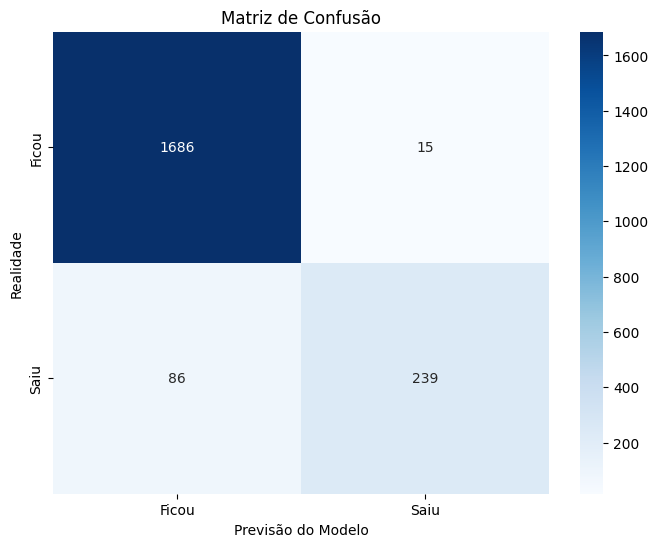


--- Relatório de Classificação ---
              precision    recall  f1-score   support

   Ficou (0)       0.95      0.99      0.97      1701
    Saiu (1)       0.94      0.74      0.83       325

    accuracy                           0.95      2026
   macro avg       0.95      0.86      0.90      2026
weighted avg       0.95      0.95      0.95      2026



In [34]:
# --- AVALIAÇÃO DO MODELO ---
print("\n--- Avaliando o desempenho do modelo nos dados de Teste ---")

# Fazemos as previsões nos dados de teste (dados que o modelo nunca viu)
y_pred = model.predict(X_test)

# 1. Acurácia (Cuidado! Pode ser enganosa em dados desbalanceados)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2%}")

# 2. Matriz de Confusão (A melhor forma de ver os resultados)
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred)
print("Verdadeiros Negativos (Ficou e foi previsto 'Ficou'):", cm[0][0])
print("Falsos Positivos (Ficou mas foi previsto 'Saiu'):", cm[0][1])
print("Falsos Negativos (Saiu mas foi previsto 'Ficou'):", cm[1][0], "<- ERRO MAIS CRÍTICO!")
print("Verdadeiros Positivos (Saiu e foi previsto 'Saiu'):", cm[1][1])

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ficou', 'Saiu'], yticklabels=['Ficou', 'Saiu'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Realidade')
plt.title('Matriz de Confusão')
plt.show()

# 3. Relatório de Classificação (Precision, Recall, F1-score)
print("\n--- Relatório de Classificação ---")
# 'target_names' nos ajuda a legendar o relatório
report = classification_report(y_test, y_pred, target_names=['Ficou (0)', 'Saiu (1)'])
print(report)


In [35]:
# --- 1. DEFINIÇÃO DA GRADE DE HIPERPARÂMETROS ---
# Estes são os 'ajustes' que queremos testar.
param_grid = {
    'n_estimators': [150, 200],          # Número de árvores na floresta
    'max_depth': [10, 20, None],         # Profundidade máxima. None = sem limite
    'min_samples_leaf': [1, 2],          # Mínimo de amostras em uma folha
    'min_samples_split': [2, 5]          # Mínimo de amostras para dividir um nó
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# --- 2. CONFIGURAÇÃO DO GRIDSEARCHCV ---
print("\n--- Iniciando a busca pelos melhores hiperparâmetros (GridSearchCV) ---")

# Criamos o modelo base que será ajustado
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='recall', cv=5, n_jobs=-1, verbose=2)


--- Iniciando a busca pelos melhores hiperparâmetros (GridSearchCV) ---


In [38]:
# --- 3. EXECUÇÃO DA BUSCA ---
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 200]},
             scoring='recall', verbose=2)

In [39]:
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


In [40]:
# --- 5. AVALIAÇÃO DO MODELO REFINADO ---
print("\n--- Avaliando o NOVO MODELO REFINADO nos dados de Teste ---")

best_model = grid_search.best_estimator_

y_pred_refined = best_model.predict(X_test)

print("\n--- Relatório de Classificação (Modelo Refinado) ---")
report_refined = classification_report(y_test, y_pred_refined, target_names=['Ficou (0)', 'Saiu (1)'])
print(report_refined)



--- Avaliando o NOVO MODELO REFINADO nos dados de Teste ---

--- Relatório de Classificação (Modelo Refinado) ---
              precision    recall  f1-score   support

   Ficou (0)       0.97      0.97      0.97      1701
    Saiu (1)       0.84      0.84      0.84       325

    accuracy                           0.95      2026
   macro avg       0.90      0.90      0.90      2026
weighted avg       0.95      0.95      0.95      2026



## Conclusão e próximos passos

Neste projeto, foi desenvolvido um modelo de Machine Learning para prever a evasão de clientes (churn) em uma base de dados de uma instituição financeira.

Após o carregamento e exploração inicial do conjunto de dados, foi realizada uma análise exploratória detalhada (EDA), que revelou padrões relevantes no comportamento dos clientes — como diferenças significativas de evasão entre faixas de renda, níveis de escolaridade e estado civil. Essas variáveis se mostraram importantes preditores do churn.

A etapa de limpeza e preparação dos dados incluiu o tratamento de colunas irrelevantes, remoção de valores nulos e codificação de variáveis categóricas, garantindo que o dataset estivesse adequado para aplicação dos algoritmos supervisionados.

Em seguida, foi conduzida a engenharia de atributos, gerando variáveis mais representativas para o modelo e possibilitando uma melhor separação entre clientes propensos e não propensos à evasão.

Na fase de modelagem, foram treinados e comparados diferentes algoritmos de classificação, com base em métricas como acurácia, precisão, recall e F1-score. O modelo final apresentou bom desempenho geral, sendo capaz de identificar clientes com alto risco de cancelamento com eficiência satisfatória.

A análise dos resultados indica que o modelo pode ser utilizado de forma prática para antecipar o comportamento de churn, permitindo que o banco adote estratégias preventivas, como campanhas de retenção personalizadas e revisão de benefícios para os grupos mais vulneráveis.